In [1]:
%matplotlib inline

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import datetime as dt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
from corr import Analyse_CORR as sa

conn=pymysql.connect("www.a667.com","kairuitouzi","kai070122","carry_investment",charset='utf8' ) 
sql="SELECT  * FROM wh_same_month_min WHERE prodcode='HSI'"
# sql="SELECT  * FROM wh_same_month_day WHERE prodcode='HSI'"
df1=pd.read_sql(sql,conn)
df1.set_index('datetime',inplace=True)
df1['Time']=df1.index.time
df1['Date']=df1.index.date
df1.head()

OK


prodcode     open     high      low    close    vol  \
datetime                                                                  
2018-01-19 09:19:00      HSI  32087.0  32092.0  32082.0  32089.0   66.0   
2018-01-19 09:20:00      HSI  32091.0  32107.0  32081.0  32096.0  414.0   
2018-01-19 09:21:00      HSI  32093.0  32095.0  32083.0  32093.0  220.0   
2018-01-19 09:22:00      HSI  32092.0  32098.0  32085.0  32088.0  196.0   
2018-01-19 09:23:00      HSI  32088.0  32090.0  32079.0  32083.0  226.0   

                     position  settlement  ratio      id      Time        Date  
datetime                                                                        
2018-01-19 09:19:00       NaN         NaN    NaN  100985  09:19:00  2018-01-19  
2018-01-19 09:20:00       NaN         NaN    NaN  100986  09:20:00  2018-01-19  
2018-01-19 09:21:00       NaN         NaN    NaN  100987  09:21:00  2018-01-19  
2018-01-19 09:22:00       NaN         NaN    NaN  100988  09:22:00  2018-01-19  
2018-01-19 09:23:00       NaN         NaN    NaN  100989  09:23:00  2018-01-19

In [185]:
df1['close'].max()

32962.0

In [17]:
time1=dt.time(22,15)
time2=dt.time(23,48)
dt1=dt.date(2019,3,25)
print(dt1,time1)
Source=df1.reset_index()
TA=Source[(Source.Date==dt1) & (Source['Time']>=time1) &  (Source['Time']<=time2)]

sa1=Analyse_CORR(Source,TA)
res=sa1.corr()
res.head(20)

2019-03-25 22:15:00
spent time: 0:01:57.046695


Corr            datetime
204098  1.000 2019-03-25 22:15:00
24931   0.964 2018-04-24 14:40:00
50511   0.963 2018-06-11 23:08:00
129306  0.953 2018-11-01 22:16:00
126543  0.953 2018-10-29 18:13:00
137449  0.953 2018-11-15 18:00:00
104175  0.951 2018-09-11 22:51:00
101256  0.951 2018-09-06 15:27:00
144627  0.950 2018-11-28 09:53:00
129017  0.950 2018-11-01 17:27:00
198416  0.949 2019-03-15 09:47:00
73077   0.949 2018-07-20 21:23:00
120515  0.949 2018-10-18 15:00:00
117822  0.948 2018-10-12 11:07:00
36321   0.946 2018-05-16 11:19:00
55345   0.945 2018-06-20 19:50:00
64722   0.945 2018-07-06 22:07:00
198051  0.943 2019-03-14 19:27:00
80624   0.943 2018-08-02 21:12:00
111268  0.943 2018-09-26 09:48:00

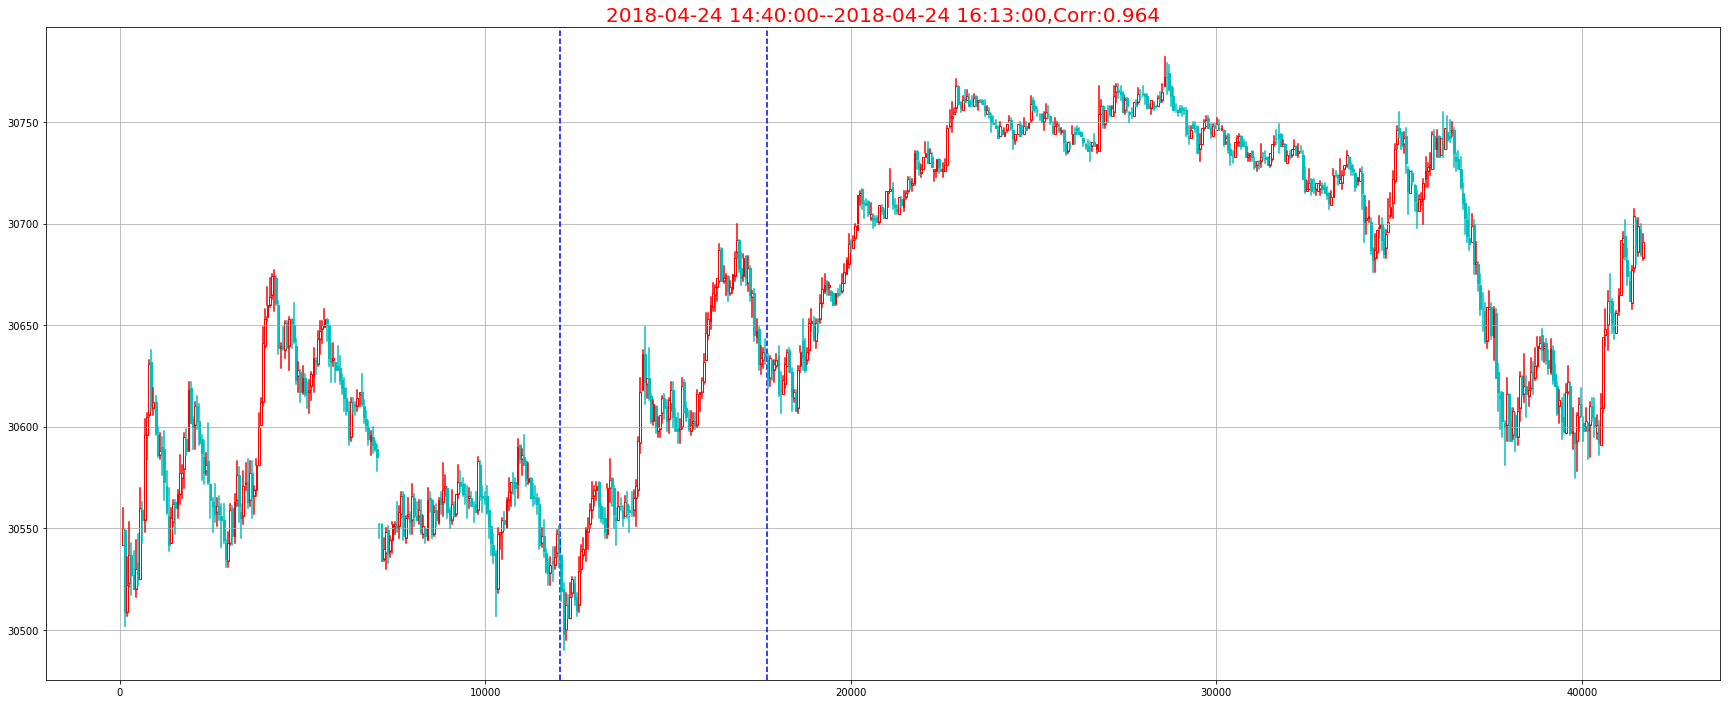

In [11]:
sa1.DrawNo(1,add1=200,add2=400)


In [20]:
# sa1.DrawNo(2,add1=200,add2=400,isSave=True)
sa1.DF_CORR.index[0]

204098

In [22]:
sa1.DF_CORR

Corr            datetime
204098  1.000 2019-03-25 22:15:00
24931   0.964 2018-04-24 14:40:00
50511   0.963 2018-06-11 23:08:00
129306  0.953 2018-11-01 22:16:00
126543  0.953 2018-10-29 18:13:00
137449  0.953 2018-11-15 18:00:00
104175  0.951 2018-09-11 22:51:00
101256  0.951 2018-09-06 15:27:00
144627  0.950 2018-11-28 09:53:00
129017  0.950 2018-11-01 17:27:00
198416  0.949 2019-03-15 09:47:00
73077   0.949 2018-07-20 21:23:00
120515  0.949 2018-10-18 15:00:00
117822  0.948 2018-10-12 11:07:00
36321   0.946 2018-05-16 11:19:00
55345   0.945 2018-06-20 19:50:00
64722   0.945 2018-07-06 22:07:00
198051  0.943 2019-03-14 19:27:00
80624   0.943 2018-08-02 21:12:00
111268  0.943 2018-09-26 09:48:00
125986  0.942 2018-10-26 22:56:00
163163  0.942 2019-01-03 20:04:00
135469  0.941 2018-11-13 11:15:00
110405  0.941 2018-09-21 13:56:00
66581   0.941 2018-07-11 09:21:00
90294   0.941 2018-08-20 13:37:00
164168  0.941 2019-01-04 22:49:00
70591   0.940 2018-07-17 21:57:00
157552  0.939 2018-12-19 16:18:00
115718  0.939 2018-10-09 19:48:00
...       ...                 ...
196202 -0.852 2019-03-12 15:53:00
80005  -0.853 2018-08-02 00:53:00
156396 -0.854 2018-12-18 10:02:00
134089 -0.855 2018-11-09 18:00:00
85610  -0.856 2018-08-10 20:18:00
203286 -0.857 2019-03-22 22:42:00
114569 -0.858 2018-10-08 13:54:00
118429 -0.859 2018-10-12 22:59:00
59296  -0.859 2018-06-27 14:56:00
111470 -0.860 2018-09-26 14:10:00
193652 -0.861 2019-03-07 15:23:00
135927 -0.862 2018-11-13 20:38:00
122509 -0.863 2018-10-22 20:59:00
39351  -0.864 2018-05-22 00:20:00
160083 -0.864 2018-12-27 13:14:00
79897  -0.864 2018-08-01 23:05:00
100274 -0.866 2018-09-05 13:05:00
113122 -0.868 2018-09-28 13:45:00
79220  -0.871 2018-08-01 10:03:00
48966  -0.871 2018-06-08 09:32:00
98353  -0.878 2018-08-31 22:41:00
173950 -0.883 2019-01-22 17:51:00
63836  -0.885 2018-07-05 21:21:00
54160  -0.886 2018-06-19 13:20:00
119469 -0.887 2018-10-16 10:34:00
161755 -0.889 2018-12-31 12:06:00
23486  -0.890 2018-04-20 19:05:00
192075 -0.895 2019-03-05 17:51:00
127150 -0.904 2018-10-30 13:35:00
148892 -0.916 2018-12-05 10:58:00

[3558 rows x 2 columns]

In [23]:
for i in range(1,50):
    sa1.DrawNo(i,200,500,isSave=True,preF='HSI1_')
    print(i)
plt.close('all')
print("OK")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
OK


In [31]:
import talib as tb

data=df9.copy()
data['ma60b']=data['close'].rolling(60).mean()
data['ma60a']=tb.MA(data['close'].values,timeperiod=60)
data

prodcode     open     high      low    close     vol  \
datetime                                                                   
2019-03-25 09:15:00      HSI  28508.0  28525.0  28479.0  28517.0  2833.0   
2019-03-25 09:16:00      HSI  28517.0  28520.0  28492.0  28504.0  2084.0   
2019-03-25 09:17:00      HSI  28503.0  28513.0  28486.0  28510.0  1436.0   
2019-03-25 09:18:00      HSI  28511.0  28522.0  28502.0  28506.0   851.0   
2019-03-25 09:19:00      HSI  28507.0  28525.0  28506.0  28516.0  1317.0   
2019-03-25 09:20:00      HSI  28515.0  28515.0  28464.0  28472.0  1807.0   
2019-03-25 09:21:00      HSI  28471.0  28472.0  28430.0  28437.0  1858.0   
2019-03-25 09:22:00      HSI  28437.0  28457.0  28423.0  28454.0  1085.0   
2019-03-25 09:23:00      HSI  28455.0  28483.0  28448.0  28480.0   718.0   
2019-03-25 09:24:00      HSI  28482.0  28535.0  28479.0  28533.0  1451.0   
2019-03-25 09:25:00      HSI  28535.0  28544.0  28513.0  28515.0  1251.0   
2019-03-25 09:26:00      HSI  28513.0  28529.0  28513.0  28529.0   625.0   
2019-03-25 09:27:00      HSI  28529.0  28529.0  28516.0  28518.0   331.0   
2019-03-25 09:28:00      HSI  28519.0  28521.0  28495.0  28506.0  1089.0   
2019-03-25 09:29:00      HSI  28506.0  28509.0  28492.0  28496.0   475.0   
2019-03-25 09:30:00      HSI  28497.0  28534.0  28495.0  28529.0  2338.0   
2019-03-25 09:31:00      HSI  28529.0  28560.0  28528.0  28555.0  1554.0   
2019-03-25 09:32:00      HSI  28554.0  28578.0  28534.0  28573.0  1577.0   
2019-03-25 09:33:00      HSI  28572.0  28582.0  28542.0  28557.0  1358.0   
2019-03-25 09:34:00      HSI  28558.0  28591.0  28558.0  28582.0  1563.0   
2019-03-25 09:35:00      HSI  28581.0  28589.0  28557.0  28578.0  1046.0   
2019-03-25 09:36:00      HSI  28579.0  28598.0  28561.0  28562.0  1057.0   
2019-03-25 09:37:00      HSI  28561.0  28573.0  28552.0  28564.0  1048.0   
2019-03-25 09:38:00      HSI  28563.0  28587.0  28552.0  28580.0   921.0   
2019-03-25 09:39:00      HSI  28579.0  28585.0  28537.0  28546.0  1154.0   
2019-03-25 09:40:00      HSI  28546.0  28565.0  28540.0  28545.0  1173.0   
2019-03-25 09:41:00      HSI  28545.0  28579.0  28543.0  28576.0  1005.0   
2019-03-25 09:42:00      HSI  28577.0  28606.0  28572.0  28597.0  1370.0   
2019-03-25 09:43:00      HSI  28597.0  28606.0  28586.0  28592.0  1104.0   
2019-03-25 09:44:00      HSI  28594.0  28609.0  28593.0  28601.0   886.0   
...                      ...      ...      ...      ...      ...     ...   
2019-03-25 19:07:00      HSI  28549.0  28549.0  28534.0  28536.0   150.0   
2019-03-25 19:08:00      HSI  28536.0  28544.0  28536.0  28543.0    37.0   
2019-03-25 19:09:00      HSI  28543.0  28546.0  28542.0  28545.0    22.0   
2019-03-25 19:10:00      HSI  28544.0  28546.0  28533.0  28535.0    71.0   
2019-03-25 19:11:00      HSI  28536.0  28545.0  28534.0  28544.0    37.0   
2019-03-25 19:12:00      HSI  28544.0  28544.0  28535.0  28535.0    64.0   
2019-03-25 19:13:00      HSI  28535.0  28541.0  28533.0  28540.0    78.0   
2019-03-25 19:14:00      HSI  28540.0  28546.0  28540.0  28543.0    39.0   
2019-03-25 19:15:00      HSI  28542.0  28547.0  28540.0  28546.0    30.0   
2019-03-25 19:16:00      HSI  28544.0  28544.0  28539.0  28539.0    18.0   
2019-03-25 19:17:00      HSI  28538.0  28544.0  28535.0  28542.0    24.0   
2019-03-25 19:18:00      HSI  28542.0  28542.0  28538.0  28540.0    18.0   
2019-03-25 19:19:00      HSI  28540.0  28540.0  28536.0  28536.0    14.0   
2019-03-25 19:20:00      HSI  28536.0  28536.0  28526.0  28529.0   111.0   
2019-03-25 19:21:00      HSI  28529.0  28531.0  28527.0  28531.0    87.0   
2019-03-25 19:22:00      HSI  28531.0  28540.0  28529.0  28540.0    58.0   
2019-03-25 19:23:00      HSI  28539.0  28542.0  28537.0  28539.0    54.0   
2019-03-25 19:24:00      HSI  28539.0  28544.0  28539.0  28544.0    40.0   
2019-03-25 19:25:00      HSI  28544.0  28544.0  28538.0  28544.0    29.0   
2019-03-25 19:26:00      HSI  28544.0  28545.0  28536.0  28536.0    

In [3]:
#------calc corrcoef 相关性
#匹配的K线个数
length=100
vv1=df1.tail(length)['close'].values
vv2=df1['close'].values
rows=len(vv2)

maxCorr=0
res=[]
resList=[]
# dt1=dt.datetime.now
for i in range(0,rows-length*2):
    vv3=vv2[i:length+i]
    corr=round(np.corrcoef(vv1,vv3)[0][1],3)
    resList.append([i,corr])
    if corr>maxCorr:
        maxCorr=corr
        res=[i,maxCorr]

print(res)

recc=pd.DataFrame(resList)
recc.columns=['No','Res']
newRec=recc.sort_values('Res',ascending=False)
newRec.head(20)

[2429, 0.864]


No    Res
2429  2429  0.864
1571  1571  0.863
2430  2430  0.860
1570  1570  0.860
1572  1572  0.853
1569  1569  0.850
5949  5949  0.849
1568  1568  0.848
5948  5948  0.843
1567  1567  0.843
2428  2428  0.842
1573  1573  0.841
2431  2431  0.838
5950  5950  0.838
5947  5947  0.833
5951  5951  0.832
1574  1574  0.828
1566  1566  0.827
2427  2427  0.824
5952  5952  0.815

In [113]:
index=newRec.index[6]
leng=100
tmp=vv2[index:index+leng]
res1=[tmp.max(),tmp.min(),tmp.mean(),tmp.size,tmp.var(),tmp.ptp()]
data2=vv2[index+leng:index+leng*2]
res2=[data2.max(),data2.min(),data2.mean(),data2.size,data2.var(),data2.ptp()]
print(np.where(data2>tmp.mean())[0].size)
print(np.where(data2>tmp.min())[0].size)
print(np.where(data2>tmp.max())[0].size)
print(np.where(data2<tmp.mean())[0].size)
print(np.where(data2<tmp.min())[0].size)
print(np.where(data2<tmp.max())[0].size)
print(res1)
print(res2)

100
100
39
0
0
61
[23059.0, 19605.0, 21119.38, 100, 943799.2956000001, 3454.0]
[24084.0, 21538.0, 22909.76, 100, 341676.5024, 2546.0]


In [2]:
from KRData.HKData import HKFuture
import configparser
import datetime

conf_parser = configparser.ConfigParser()
conf_parser.read( 'conf.ini')
db_host = conf_parser.get('MGDB', 'host')
db_user = conf_parser.get('MGDB', 'user')
db_password = conf_parser.get('MGDB', 'password')

hk = HKFuture(pwd=db_password,host=db_host,user=db_user)
hk.get_all_codes()
_fields = ['datetime', 'code', 'open', 'high', 'low', 'close', 'vol']
hsi=hk.get_main_contract_bars('HSI', _fields)

In [44]:
d2=hsi['close'].values
len(d2)

1221197

In [16]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import datetime as dt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
import datetime as dt
import mpl_toolkits.axisartist as AA

class Analyse_CORR:
    def __init__(self,source,target):
        self.Data=source #数据源
        self.DataT=target
        self.Amount=len(target)  #分析的个数
        self.V1=target['close'].values #分析的数据集
        self.V2=source['close'].values #总数据集
        self.V2_LEN=len(self.V2)
#         self.FIG,self.AX = plt.subplots(figsize=(30,12),dpi=200)
#         self.FIG=plt.figure(figsize=(30,12),dpi=200)
#         self.AX=self.FIG.add_subplot(111)
        
    def corr(self):
        resList=[]
        vv1=self.V1
        vv2=self.V2
        rows=self.V2_LEN
        length=self.Amount
        time1=dt.datetime.now()
        for i in range(0,rows-length):
            vv3=vv2[i:length+i]
            corr=round(np.corrcoef(vv1,vv3)[0][1],3)
            resList.append(corr)
        diff=int(length*0.5)
        res=self.fix_corr(resList,diff)
        time2=dt.datetime.now()
        print("spent time:",time2-time1)
        return res
    
    def fix_corr(self,source,diff=60):
        df_corr=pd.DataFrame(source)
        df_corr.columns=['Corr']
        df_corr.sort_values('Corr',ascending=False,inplace=True)

        newList=[]
        for row in df_corr.iterrows():
            index=row[0]
            insert=True
            for i in newList:
                if i> index-diff and i< index+diff:
                    insert=False
                    break
            if insert:
                newList.append(index)

        df_res=df_corr.loc[newList]
        df_res['datetime']=df_res.apply(lambda x:self.Data.iloc[x.name]['datetime'],axis=1)
        self.DF_CORR=df_res
        return df_res
    
    #draw kline
    def DrawKK(self,aa,add1=0,add2=0,preF='T_',corr=0,isSave=False):
        fig =plt.figure(figsize=(30, 12),facecolor='w')
        ax =fig.add_subplot(111)
        

#         ax = AA.Axes(self.FIG, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
#         self.FIG.add_axes(ax)
#         ax.clear()
#         ax.clear()
        k_width = 50
        k_diff = 10
        kline = k_width + k_diff
        d=0
        rows=len(aa)
        
#         ax = AA.Axes(self.FIG, [0, 0,3000,30000)  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
#         ax = self.FIG.subplots()
# #         plt.cla()
#         ax.set_xlim(0,rows*kline)
#         ax.set_ylim(0,aa['close'].max())
        
        
        if add1>0:
            ax.axvline((add1+1)*kline,ymax=1,c='b',ls='dashed')
        if add2>0:
            ax.axvline((rows-add2+1)*kline,ymax=1,c='b',ls='dashed')
        for i in aa.iterrows():
            d=d+1
            x = d * kline
            O = i[1]['open']
            C = i[1]['close']
            L = i[1]['low']
            H = i[1]['high']
            hh = abs(C - O)
            x1 = x + k_width / 2
            if C > O:
                a = False
                y = O
                cc = 'R'
                # 上影线 下影线
                line1 = Line2D((x1, x1), (C, H), color=cc)
                line2 = Line2D((x1, x1), (O, L), color=cc)

                ax.add_line(line1)
                ax.add_line(line2)
            else:
                a = True
                y = C
                cc = 'C'
                # 影线
                line = Line2D((x1, x1), (L, H), color=cc)
                ax.add_line(line)
            hh = abs(C - O)

            # K线实体
            rec = Rectangle((x, y), k_width, hh, fill=a, color=cc)
            ax.add_patch(rec)
        ax.grid()
        ax.autoscale(tight=False)
        ax.autoscale_view()
        time1=aa.iloc[add1]['datetime']
        if add2==0:
            diff=-1
        else:
            diff=-add2-1
        time2=aa.iloc[diff]['datetime']
        title="%s--%s,Corr:%.3f" %(time1,time2,corr)
        ax.set_title(title, fontsize=20, color='r')
        if isSave:
            file="res/%s%d_%.7s.jpg"%(preF,self.Amount,time1)
            fig.savefig(file)
            self.FIG=fig
            fig.clear()
            plt.close(fig)
    
    def DrawIndex(self,ind,add1=0,add2=0,isSave=False,preF='T_'):
        if add1>ind:
            add1=ind
        begin=ind-add1
        length=self.Amount
        end=begin+length+add2+add1
        df2=self.Data.iloc[begin:end]
        v1=self.DF_CORR.loc[ind]['Corr']
        file="res/%s.jpg"%(ind)
        self.DrawKK(df2,add1=add1,add2=add2,corr=v1,isSave=isSave,preF=preF)
        
    def DrawNo(self,no,add1=0,add2=0,isSave=False,preF='T_'):
        index=self.DF_CORR.index[no]
        self.DrawIndex(index,add1,add2,isSave,preF=preF+str(no))
        
print("OK")


OK


In [114]:
class TestPLT:
    def __init__(self):
        self.FIG,self.AX =plt.subplots(figsize=(8,6),facecolor='w',dpi=100)
        
    def toSave(self,i):
        ax1=self.AX
    
        x = np.arange(0, 100)
        ax1.plot(x, np.log(x))
        name="Test_%d"%(i)
        ax1.set_title(name)
        self.FIG.savefig("res/%s.jpg"%(name))

Text(0.5,1,'c    cc')

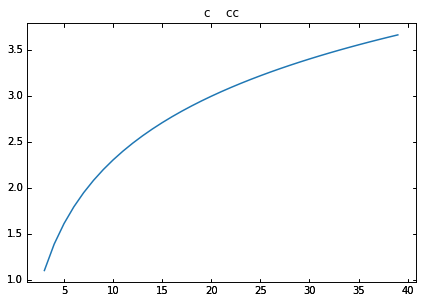

In [3]:
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure() #定义figure，（1）中的1是什么
# ax=fig.add_subplot(111)
ax = AA.Axes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
fig.add_axes(ax)
x = np.arange(1, 100)
ax.plot(x, np.log(x))
ax.set_title('aa')
plt.clf()
ax = AA.Axes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
fig.add_axes(ax)
# ax=fig.add_subplot(111)
ax.clear()
x = np.arange(3, 40)
ax.plot(x, np.log(x))
ax.set_title("c    cc")
